# Integrate and fire cell
Code to prototype the integrate and fire cell using `h.IntFire4()`

In [27]:
from neuron import h
from neuron.units import mV, ms
h.load_file('stdrun.hoc')

import matplotlib.pyplot as plt

## Create an INF cell

In [76]:
class INF:
    def __init__(self, metadata, taue=2, taui1=3, taui2=4, taum=6, ex_weight=.5, in_weight=-.5, x = 'na', y = 'na'):
        self.metadata = metadata
        
        # cell positioning
        self.x = x
        self.y = y
        
        # cell signaling
        self.ex_weight = ex_weight # weight of excitatory stimulus
        self.in_weight = in_weight # weight of inhibitory stimulus (h.IntFire4() treats negative weights as inhibitory)
        
        # create cell
        self.cell = h.IntFire4()
        
        self.taue = taue
        self.cell.taue = taue     # ms excitatory input time constant
        self.taui1 = taui1
        self.cell.taui1 = taui1   # ms inhibitory input rise time constant
        self.taui2 = taui2
        self.cell.taui2 = taui2   # ms inhibitory input fall time constant
        self.taum = taum
        self.cell.taum = taum     # membrane time constant
        
        # setup connections:
            # dictionaries with {'stim_title':{'stim','sender','stim_times'}}
        self.stims_poisson = {}
        self.stims_sending = {} 
        self.stims_recieving = {}
        
        # setup recording
        # setup recording
        self.spike_detector = h.NetCon(self.cell, None)
        self.spike_times = h.Vector()
        self.spike_detector.record(self.spike_times)
        
        self._m = h.Vector().record(self.cell._ref_m)
        self._e = h.Vector().record(self.cell._ref_e)
        
    def check_INF_taus(self):
        # check the time constants to see if they meet the needed constraint:
            # taue < taui1 < taui2 < taum
        return self.cell.taue < self.cell.taui1 < self.cell.taui2 < self.cell.taum
    
    def add_poisson_stimulus(self, stim_title, n_stimuli, stim_interval, delay, weight):
        # create stimulus
        stim = h.NetStim()
        stim.number = n_stimuli
        stim.interval = stim_interval * ms
        stim.noise = True
        stim.start = 0 * ms
        stim_times = h.Vector()
        
        # connect to cell
        nc = h.NetCon(stim, self.cell)
        nc.delay = delay * ms
        nc.weight[0] = weight
        nc.record(stim_times)
        
        self.stims_poisson[stim_title] = {
            'stim': stim,
            'stim_times': stim_times
        }
        
    def plot_cell(self, sim_length):
        fig, axes = plt.subplots(3,1, figsize = (15,7), sharex = True)
        
        # inputs
        axes[0].set_ylabel('stimuli')
        stim_num = 0
        stim_titles = []
        for stim in self.stims_poisson:
            stim_titles.append(stim)
            axes[0].vlines(list(self.stims_poisson[stim]['stim_times']), stim_num, stim_num + 1)
            stim_num += 1
        
        # model states
        axes[2].set_ylabel('membrane state variable')
        axes[1].plot(self._m)
        
        # model output
        axes[2].set_ylabel('output')
        axes[2].vlines(list(self.spike_times), 0, 1)
        
        axes[0].set_xlim(0, sim_length)
        return

taus check: True


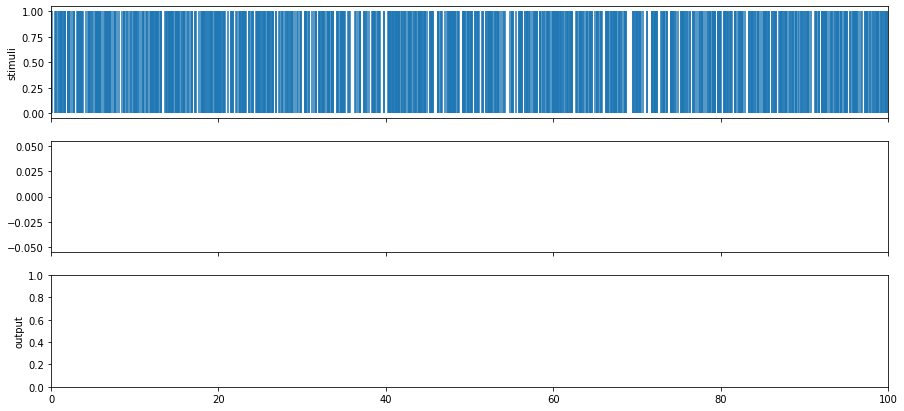

In [105]:
cell = INF({})
print('taus check:',inf.check_INF_taus())
cell.add_poisson_stimulus('ex1', 999999, .1, 0, 10)

sim_length = 100
h.finitialize()
h.continuerun(sim_length)

cell.plot_cell(sim_length)

In [106]:
from neuron import h
from neuron.units import mV, ms
h.load_file("stdrun.hoc")
cell = h.IntFire4()
# setup taus
cell.taue = 2
cell.taum = 10
# setup recording
spike_detector = h.NetCon(cell, None)
spike_times = h.Vector()
spike_detector.record(spike_times)
# add stimulus
stim = h.NetStim()
stim.number = 999999
stim.interval = 2 * ms
stim.noise = True
stim.start = 0 * ms
stim_times = h.Vector()
# connect stimulus to cell
nc = h.NetCon(stim, cell)
nc.delay = 0 * ms
nc.weight[0] = .8
nc.record(stim_times)
# run sim
sim_length = 100
h.finitialize()
h.continuerun(sim_length)
print("stim_times", list(stim_times))
print("spike_times", list(spike_times))

stim_times [2.817655000460172, 4.118048813807582, 8.464834779979004, 11.317561763848314, 11.423945335499171, 11.492529780735607, 22.036631025147564, 25.2248218601114, 25.450332773743337, 29.562398600234218, 37.83738514221704, 40.404596444525446, 40.87512970362346, 43.374017134406, 44.46661625087239, 49.51591595966684, 49.85604357759633, 52.49441582689037, 53.498814905003925, 53.51446781684092, 53.675444670284094, 55.92975620961927, 58.08753316259227, 60.08913876276199, 63.52382890798154, 63.81638994894315, 64.46733715876611, 64.49502391836067, 64.98103212403292, 65.9275961453227, 67.16130769637125, 68.6321839188514, 69.34423617465828, 73.14694455592567, 73.29242545869532, 73.97148512306325, 74.7641548303272, 75.45679521991282, 83.06466644798014, 85.10798843520318, 85.43708181571866, 85.52233786977516, 86.04721188897464, 89.7050032577202, 90.40905533415804, 97.38521051192357]
spike_times [4.790099715866525, 8.698039816065371, 11.529698556867439, 12.188089295489617, 13.20226215638693, 15